<a href="https://colab.research.google.com/github/Daniel-ASG/Aulas_de_cursos/blob/main/Machine_Learning_Introdu%C3%A7%C3%A3o_a_algoritmos_n%C3%A3o_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
import pandas as pd

In [44]:
url = 'https://github.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/raw/master/movies.csv'
filmes = pd.read_csv(url)
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [45]:
filmes.columns = ['filme_id', 'titulo', 'generos']
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [46]:
generos = filmes.generos.str.get_dummies()
generos.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados

array([[-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698,  2.59101927, ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       ...,
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995,  2.0807022 , -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534],
       [-0.05917995, -0.48060698, -0.3859485 , ..., -0.49125897,
        -0.20201972, -0.13206534]])

In [50]:
generos_escalados.shape

(9742, 20)

In [51]:
from sklearn.cluster import KMeans

In [52]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f'Grupos {modelo.labels_}')

Grupos [0 0 1 ... 1 0 1]


In [53]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[-0.05917995 -0.00864732  0.90222182  2.24759932  2.4488033   0.20962694
  -0.31476151 -0.20253474 -0.59213503  0.89214979 -0.09492563 -0.27549544
   0.33054416  0.37480914 -0.12679203 -0.27202043  0.1301769  -0.47033271
  -0.17001952 -0.08421394]
 [ 0.0317986  -0.17221517 -0.09609698 -0.25282145 -0.27045122  0.183437
  -0.27808305  0.11306209  0.07053001 -0.08885492 -0.08989352 -0.11613781
  -0.05843697  0.01018049 -0.22047572  0.16322315 -0.07526955 -0.48687277
   0.07115097  0.04056819]
 [-0.05917995  0.45087365 -0.10765877 -0.2333134  -0.26719745 -0.55963096
   0.84717995 -0.21354076  0.05127256 -0.12248588  0.27115761  0.4108626
   0.02091406 -0.17489929  0.62305687 -0.31634824  0.14400667  1.45127272
  -0

In [54]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.008647,0.902222,2.247599,2.448803,0.209627,-0.314762,-0.202535,-0.592135,0.892150,-0.094926,-0.275495,0.330544,0.374809,-0.126792,-0.272020,0.130177,-0.470333,-0.170020,-0.084214
1,0.031799,-0.172215,-0.096097,-0.252821,-0.270451,0.183437,-0.278083,0.113062,0.070530,-0.088855,-0.089894,-0.116138,-0.058437,0.010180,-0.220476,0.163223,-0.075270,-0.486873,0.071151,0.040568
2,-0.059180,0.450874,-0.107659,-0.233313,-0.267197,-0.559631,0.847180,-0.213541,0.051273,-0.122486,0.271158,0.410863,0.020914,-0.174899,0.623057,-0.316348,0.144007,1.451273,-0.117526,-0.072050


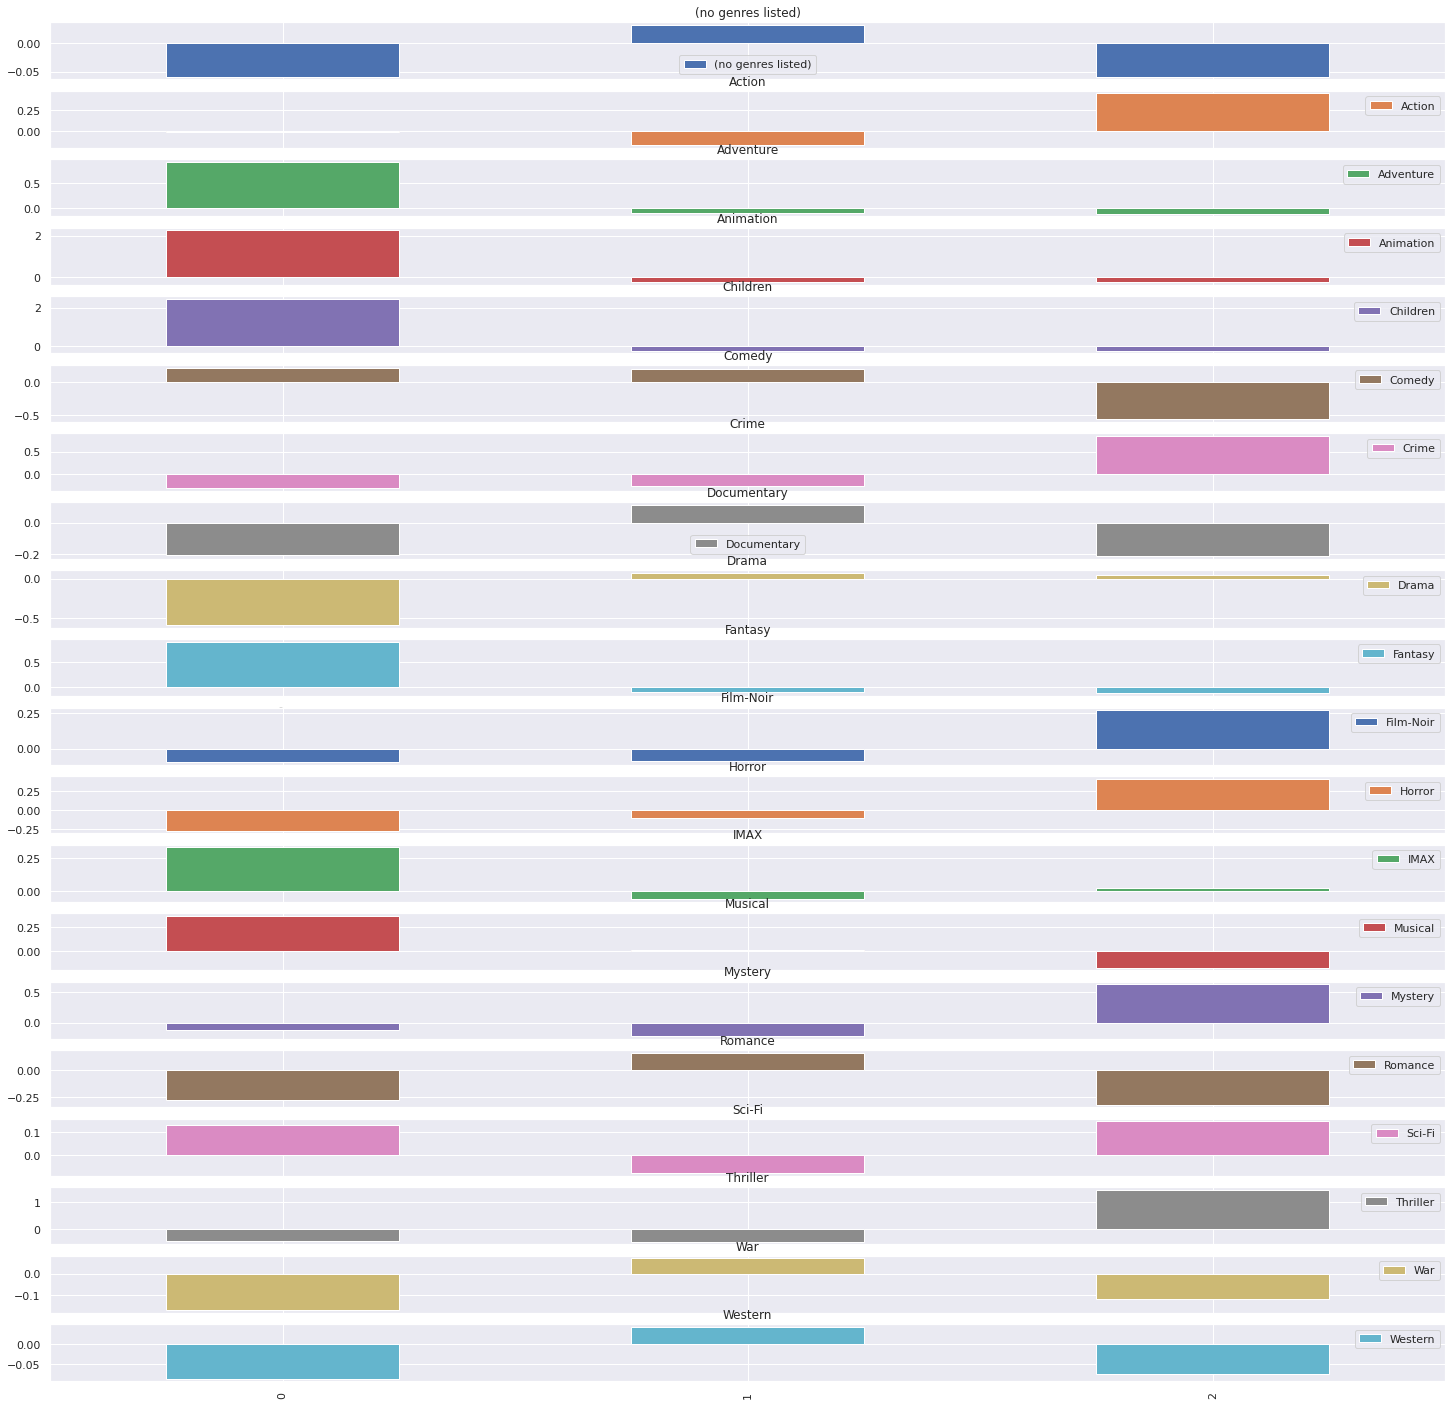

In [55]:
grupos.plot.bar(subplots=True, figsize=(25,25), sharex=False);

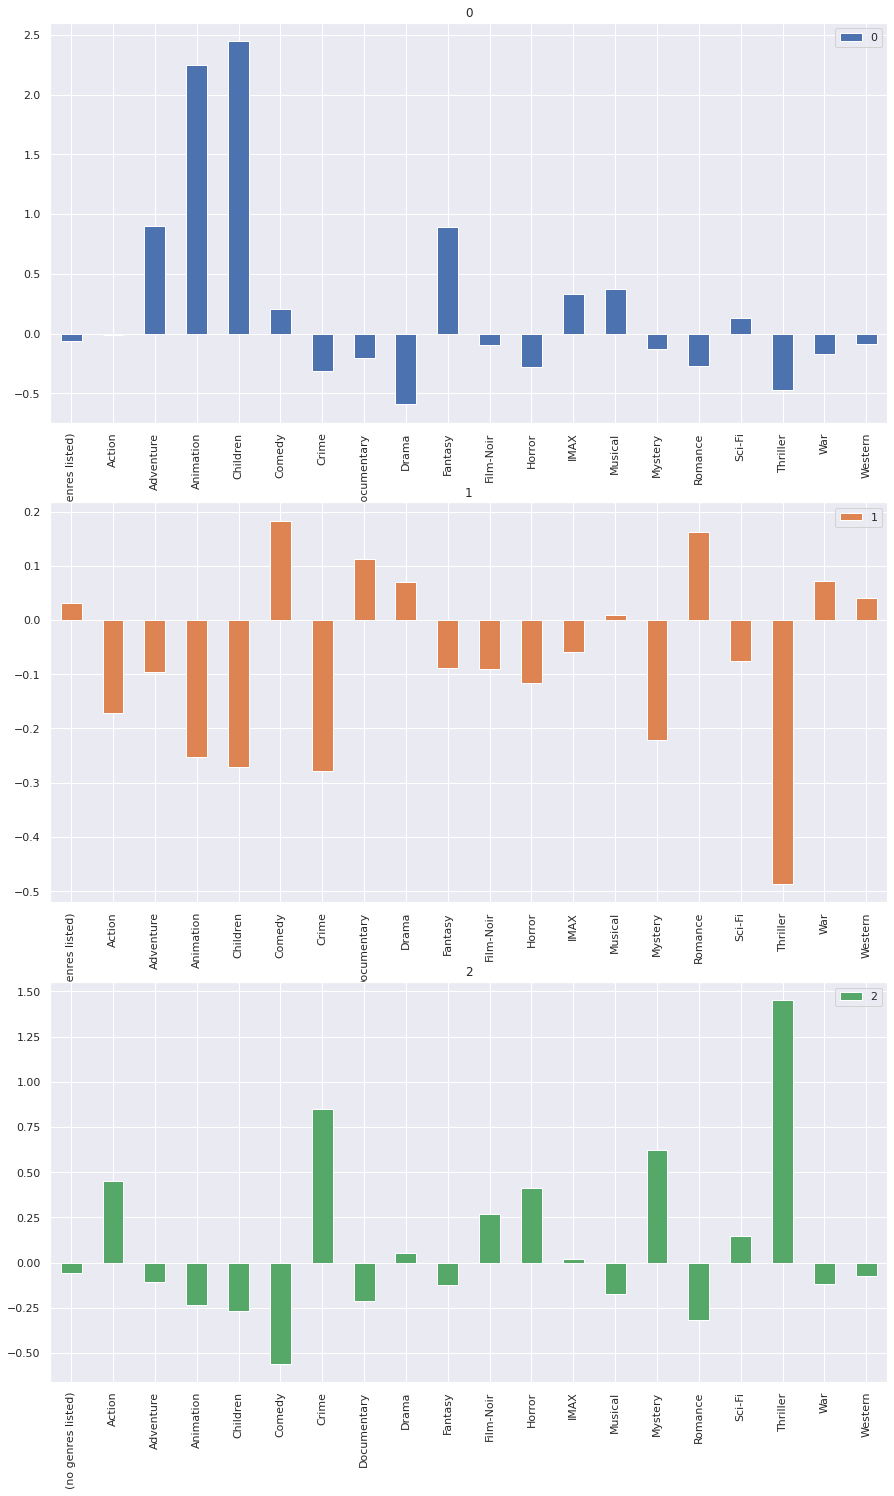

In [56]:
grupos.T.plot.bar(subplots=True, figsize=(15,25), sharex=False);

In [57]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
7264,74553,"Secret of Kells, The (2009)",Animation|Fantasy,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1081,1405,Beavis and Butt-Head Do America (1996),Adventure|Animation|Comedy|Crime,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9545,172825,Adventures of Mowgli: The Kidnapping (1968),Adventure|Animation|Children,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6851,62008,Dead Fury (2008),Action|Animation|Comedy|Horror,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8792,129779,Ghost in the Shell Arise - Border 1: Ghost Pai...,Action|Animation|Sci-Fi,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8535,115111,Ward 13 (2003),Action|Animation|Comedy|Horror,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8294,106441,"Book Thief, The (2013)",Children|Drama|War,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
8328,107449,"Muppet Christmas: Letters to Santa, A (2008)",Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5543,26631,Alice (Neco z Alenky) (1988),Animation|Fantasy|Mystery,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
8835,132046,Tomorrowland (2015),Action|Adventure|Children|Mystery|Sci-Fi,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [58]:
from sklearn.manifold import TSNE

In [59]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 35.65084 , -23.688671],
       [-57.287384, -14.623058],
       [-20.987455, -29.657082],
       ...,
       [ 14.012581, -13.191566],
       [ 45.41068 ,  19.788551],
       [-12.02306 ,  21.334173]], dtype=float32)

In [60]:
import seaborn as sns

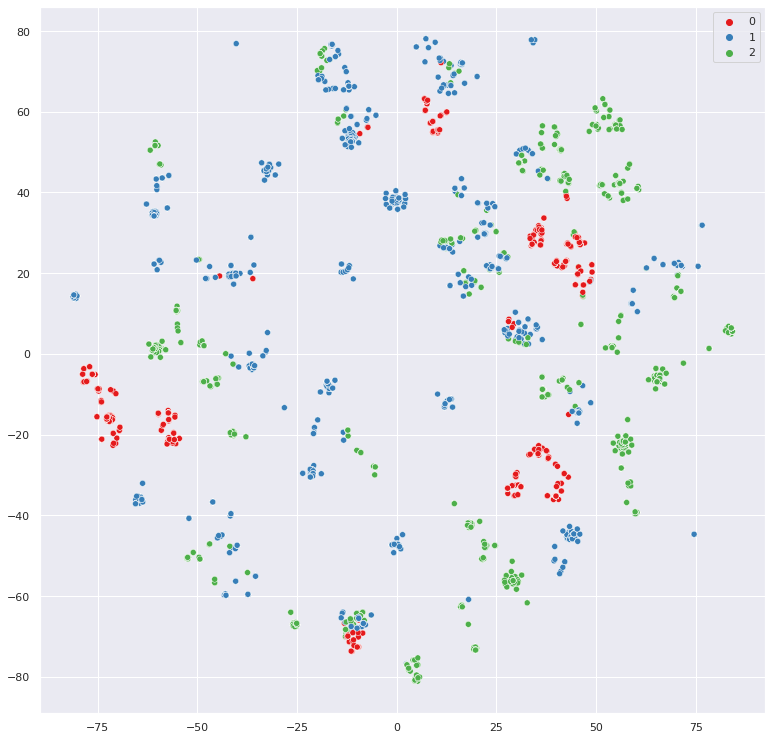

In [61]:
sns.set(rc={'figure.figsize': (13,13)})


sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1],
                hue=modelo.labels_, palette=sns.color_palette('Set1', 3));

In [62]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,-0.059180,-0.280888,-0.357441,-0.258679,-0.270451,-0.364915,-0.216398,-0.217489,-0.592124,-0.027502,-0.094926,2.993517,-0.128397,-0.188419,-0.249986,-0.372408,0.247703,0.604514,-0.202020,-0.132065
1,-0.059180,0.494982,-0.317554,-0.258679,-0.270451,-0.146197,2.669289,-0.217489,0.240242,-0.245771,-0.094926,-0.317961,-0.128397,-0.188419,-0.249986,-0.364225,-0.306295,0.675917,-0.202020,-0.132065
2,-0.059180,-0.316543,-0.297084,-0.258679,-0.270451,1.262425,-0.374632,-0.217489,-0.297431,-0.180170,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.447259,-0.202020,-0.132065
3,-0.059180,-0.299382,-0.303701,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,0.991553,-0.212825,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,0.019559,-0.202020,-0.132065
4,16.897616,-0.480607,-0.385949,-0.258679,-0.270451,-0.792126,-0.374632,-0.217489,-0.900247,-0.294810,-0.094926,-0.334055,-0.128397,-0.188419,-0.249986,-0.442633,-0.334435,-0.491259,-0.202020,-0.132065
5,-0.059180,-0.456038,-0.357392,-0.238898,-0.260936,-0.599974,-0.338134,4.597924,-0.808616,-0.277127,-0.094926,-0.318096,-0.128397,-0.188419,-0.229602,-0.429675,-0.334435,-0.479140,-0.078470,-0.132065
6,-0.059180,-0.333405,-0.317512,-0.163864,-0.270451,-0.744895,1.444723,-0.217489,0.255531,-0.252433,10.534563,-0.257559,-0.128397,-0.188419,0.922484,-0.194188,-0.219795,0.699553,-0.202020,-0.043513
7,-0.059180,1.026999,1.121377,0.628865,0.482962,-0.441032,-0.162713,0.026329,-0.492945,0.801904,-0.094926,-0.081328,7.788339,0.089846,-0.088586,-0.288731,0.970137,0.068485,-0.071589,-0.034545
8,-0.059180,-0.436446,-0.270463,-0.134234,-0.270451,0.279428,-0.282789,0.031584,0.009928,-0.104112,-0.094926,-0.233654,-0.128397,5.307322,-0.176707,0.395868,-0.248455,-0.458584,-0.157606,-0.132065
9,-0.059180,1.713257,1.692905,-0.258679,-0.270451,-0.358677,-0.214087,-0.217489,-0.556586,0.700789,-0.094926,-0.263853,-0.128397,-0.188419,-0.223086,-0.260231,-0.334435,0.462972,-0.202020,-0.132065


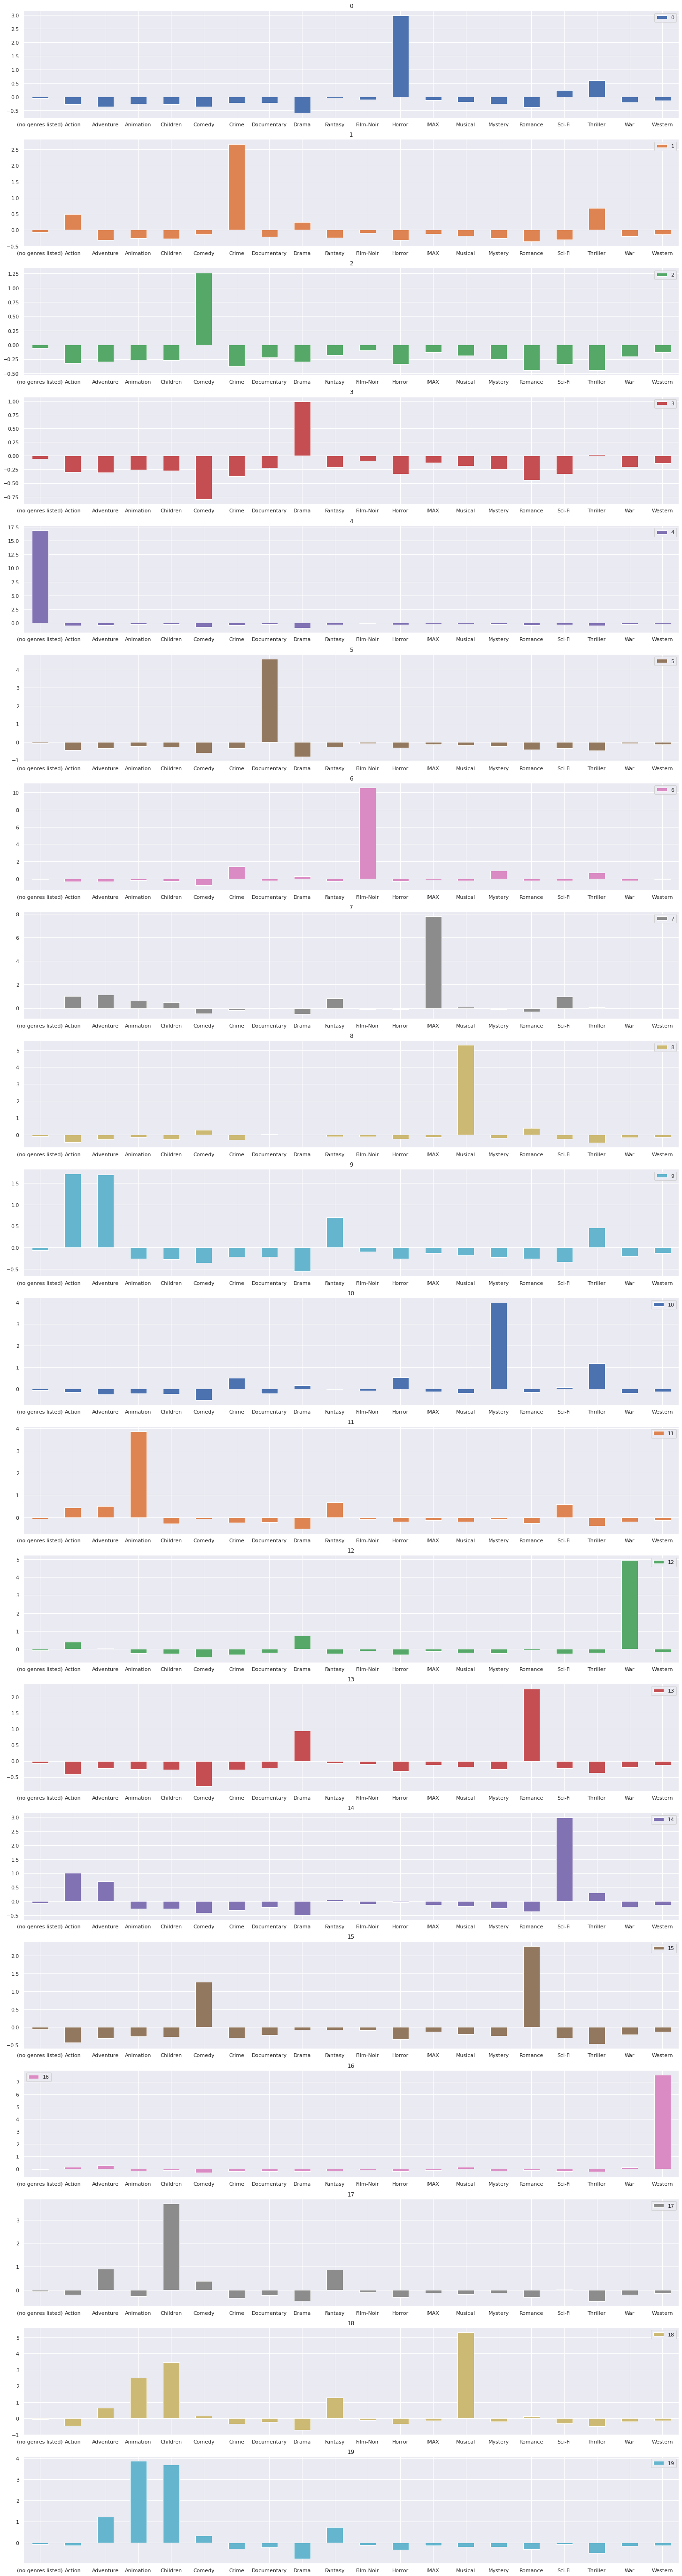

In [63]:
grupos.T.plot.bar(subplots=True, figsize=(25,100), sharex=False,
                  rot=0);

In [64]:
grupo = 18
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
95,107,Muppet Treasure Island (1996),Adventure|Children|Comedy|Musical,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
6626,56152,Enchanted (2007),Adventure|Animation|Children|Comedy|Fantasy|Mu...,0,0,1,1,1,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0
6230,46062,High School Musical (2006),Children|Comedy|Drama|Musical|Romance,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1562,2099,Song of the South (1946),Adventure|Animation|Children|Musical,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
787,1030,Pete's Dragon (1977),Adventure|Animation|Children|Musical,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2536,3396,"Muppet Movie, The (1979)",Adventure|Children|Comedy|Musical,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
578,709,Oliver & Company (1988),Adventure|Animation|Children|Comedy|Musical,0,0,1,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1372,1881,Quest for Camelot (1998),Adventure|Animation|Children|Fantasy|Musical,0,0,1,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
782,1024,"Three Caballeros, The (1945)",Animation|Children|Musical,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1545,2081,"Little Mermaid, The (1989)",Animation|Children|Comedy|Musical|Romance,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [65]:
def kmeans(numero_de_clusters, generos):
    modelo = KMeans(n_clusters=numero_de_clusters)
    modelo.fit(generos)
    return [numero_de_clusters, modelo.inertia_]

In [66]:
kmeans(20, generos_escalados)

[20, 54823.279696480575]

In [67]:
kmeans(3, generos_escalados)

[3, 166633.4125586158]

In [68]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]

In [69]:
resultado

[[1, 194840.0],
 [2, 179483.94029403635],
 [3, 167732.08138009394],
 [4, 157242.47934745025],
 [5, 146218.63515905273],
 [6, 138260.43644248886],
 [7, 127748.08581632352],
 [8, 119437.90175450864],
 [9, 110777.69541843259],
 [10, 102051.5545628084],
 [11, 94089.9018750923],
 [12, 89040.47966946088],
 [13, 79262.03737734711],
 [14, 75784.2039902268],
 [15, 69540.80862017786],
 [16, 63502.37416548307],
 [17, 62862.68654438596],
 [18, 58635.434476608556],
 [19, 57387.94485567906],
 [20, 56495.110316261766],
 [21, 53835.991556718065],
 [22, 52411.06497118623],
 [23, 50957.921582997995],
 [24, 49463.94062531941],
 [25, 47612.20960940613],
 [26, 47239.66612951784],
 [27, 46360.62867989635],
 [28, 44802.59711319032],
 [29, 42955.38228904527],
 [30, 43197.06654004105],
 [31, 41729.270338454655],
 [32, 40775.413408973756],
 [33, 39808.11626856216],
 [34, 38940.62497973882],
 [35, 38924.329390661806],
 [36, 37403.86154422252],
 [37, 37928.73253275957],
 [38, 36962.56985952363],
 [39, 35882.70854

In [70]:
resultado = pd.DataFrame(resultado, columns=['grupos', 'inertia'])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179483.940294
2,3,167732.081380
3,4,157242.479347
4,5,146218.635159
5,6,138260.436442
6,7,127748.085816
7,8,119437.901755
8,9,110777.695418
9,10,102051.554563


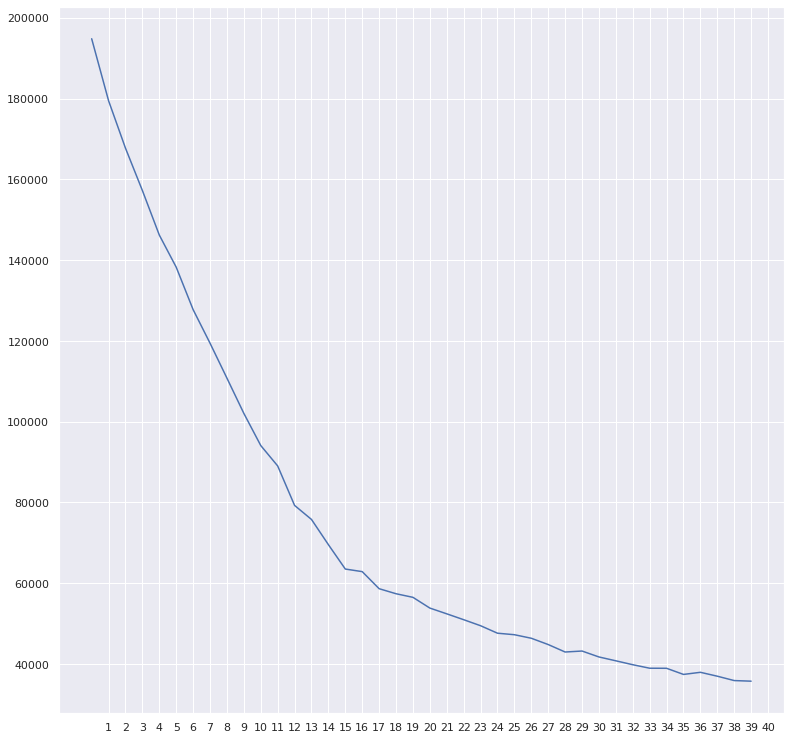

In [71]:
resultado.inertia.plot(xticks=resultado.grupos);

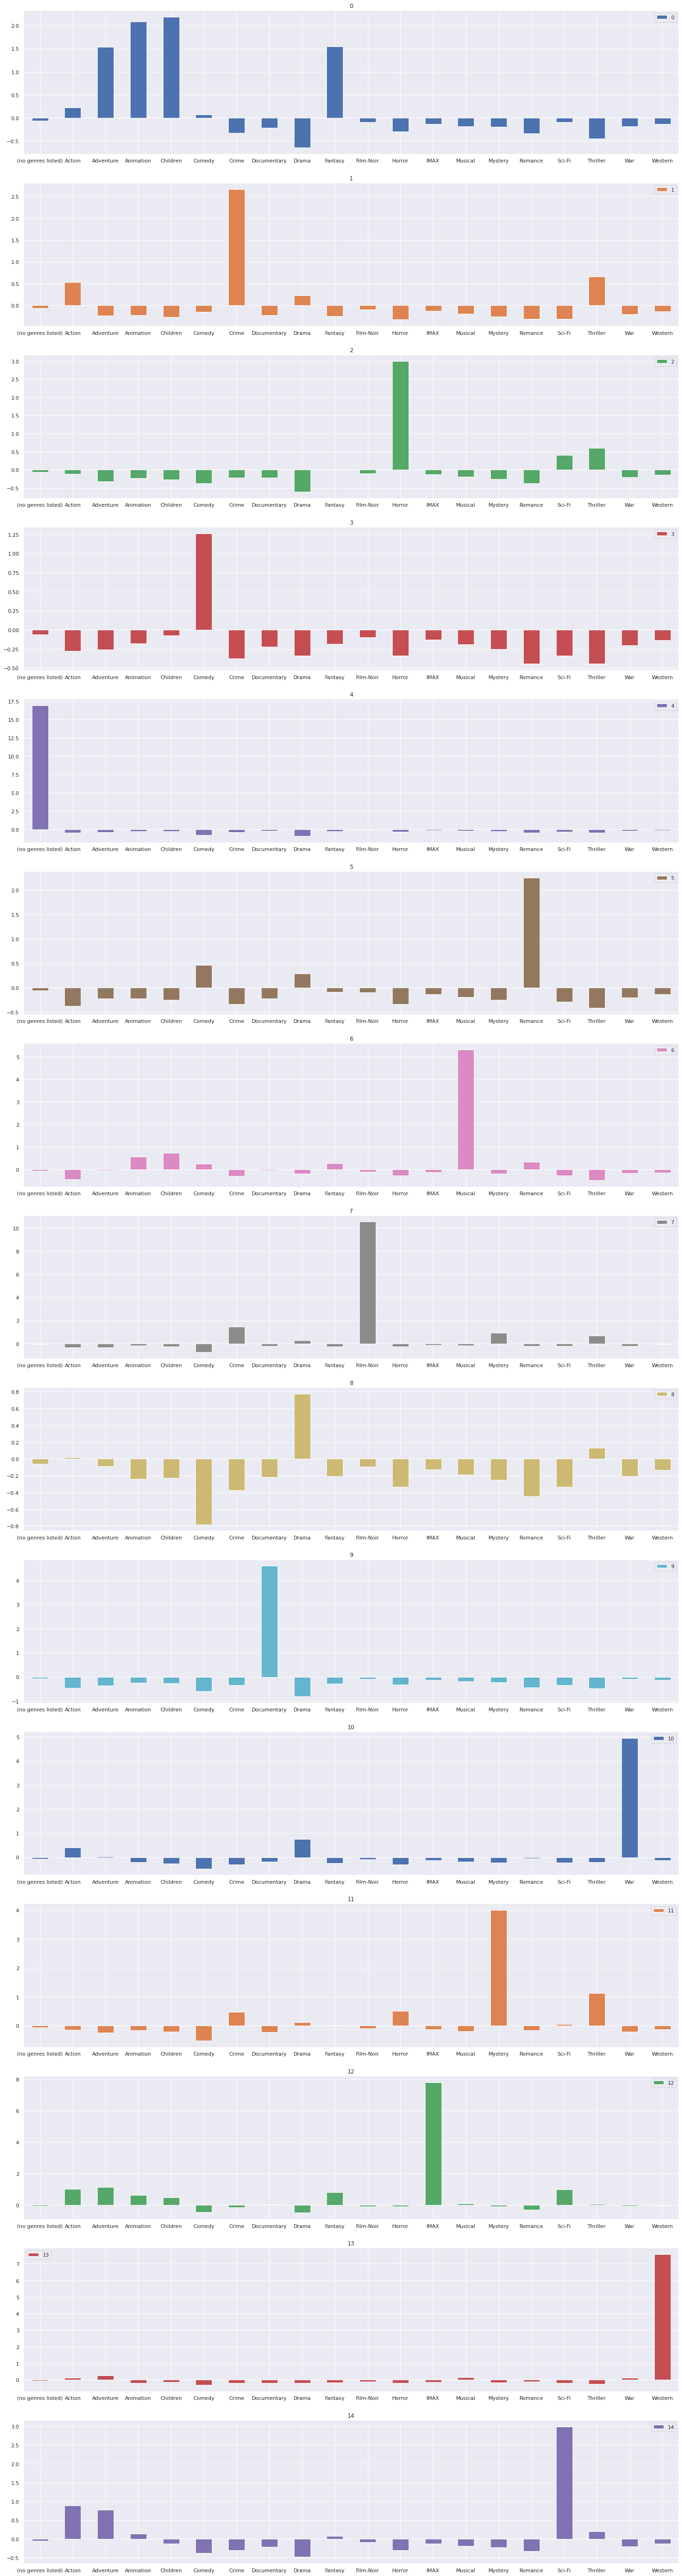

In [72]:
modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.T.plot.bar(subplots=True, figsize=(25,100), sharex=False, rot=0);

In [73]:
grupo = 14
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
8686,122892,Avengers: Age of Ultron (2015),Action|Adventure|Sci-Fi,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8721,126426,Solyaris (1968),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
9391,163985,ARQ (2016),Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
4685,6996,Highlander II: The Quickening (1991),Action|Sci-Fi,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7607,86864,Mothra (Mosura) (1961),Adventure|Fantasy|Sci-Fi,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3455,4713,Altered States (1980),Drama|Sci-Fi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
5004,7743,Explorers (1985),Adventure|Children|Sci-Fi,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8314,106927,RoboGeisha (Robo-geisha) (2009),Action|Comedy|Sci-Fi,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1057,1374,Star Trek II: The Wrath of Khan (1982),Action|Adventure|Sci-Fi|Thriller,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
7547,85179,Summer Wars (Samâ wôzu) (2009),Adventure|Animation|Comedy|Sci-Fi,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [74]:
from sklearn.cluster import AgglomerativeClustering

In [75]:
modelo = AgglomerativeClustering(n_clusters=15)
grupos = modelo.fit_predict(generos_escalados)
grupos

array([ 5,  0, 13, ...,  2,  5,  2])

In [76]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[-57.10249   , -28.76159   ],
       [  0.17182967,  43.298344  ],
       [ 19.022484  , -31.205269  ],
       ...,
       [ -0.7775101 , -15.207729  ],
       [ 30.012836  , -16.141245  ],
       [-21.926203  ,  17.631067  ]], dtype=float32)

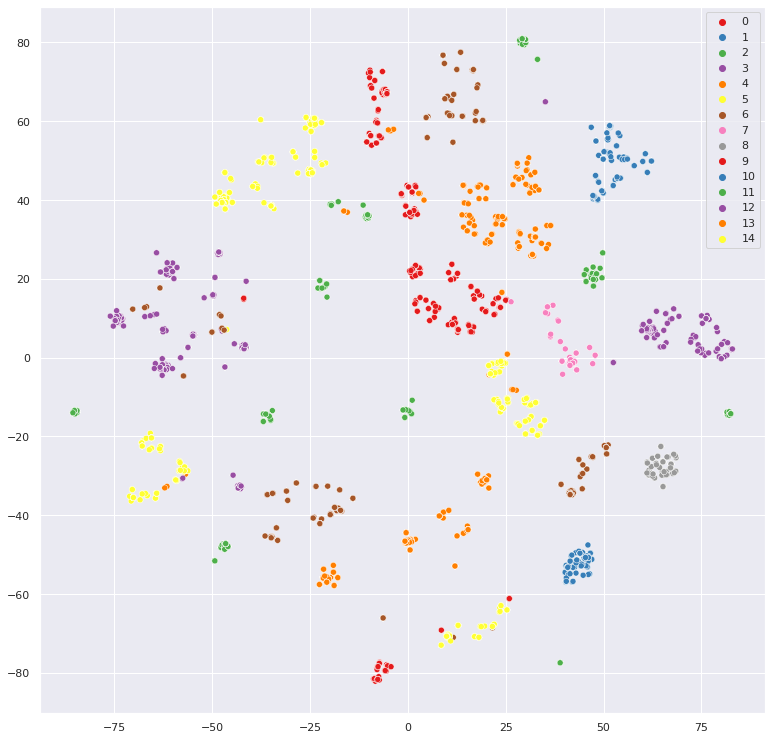

In [77]:
sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1], hue=grupos, palette=sns.color_palette('Set1', 15));

In [78]:
from scipy.cluster.hierarchy import dendrogram, linkage

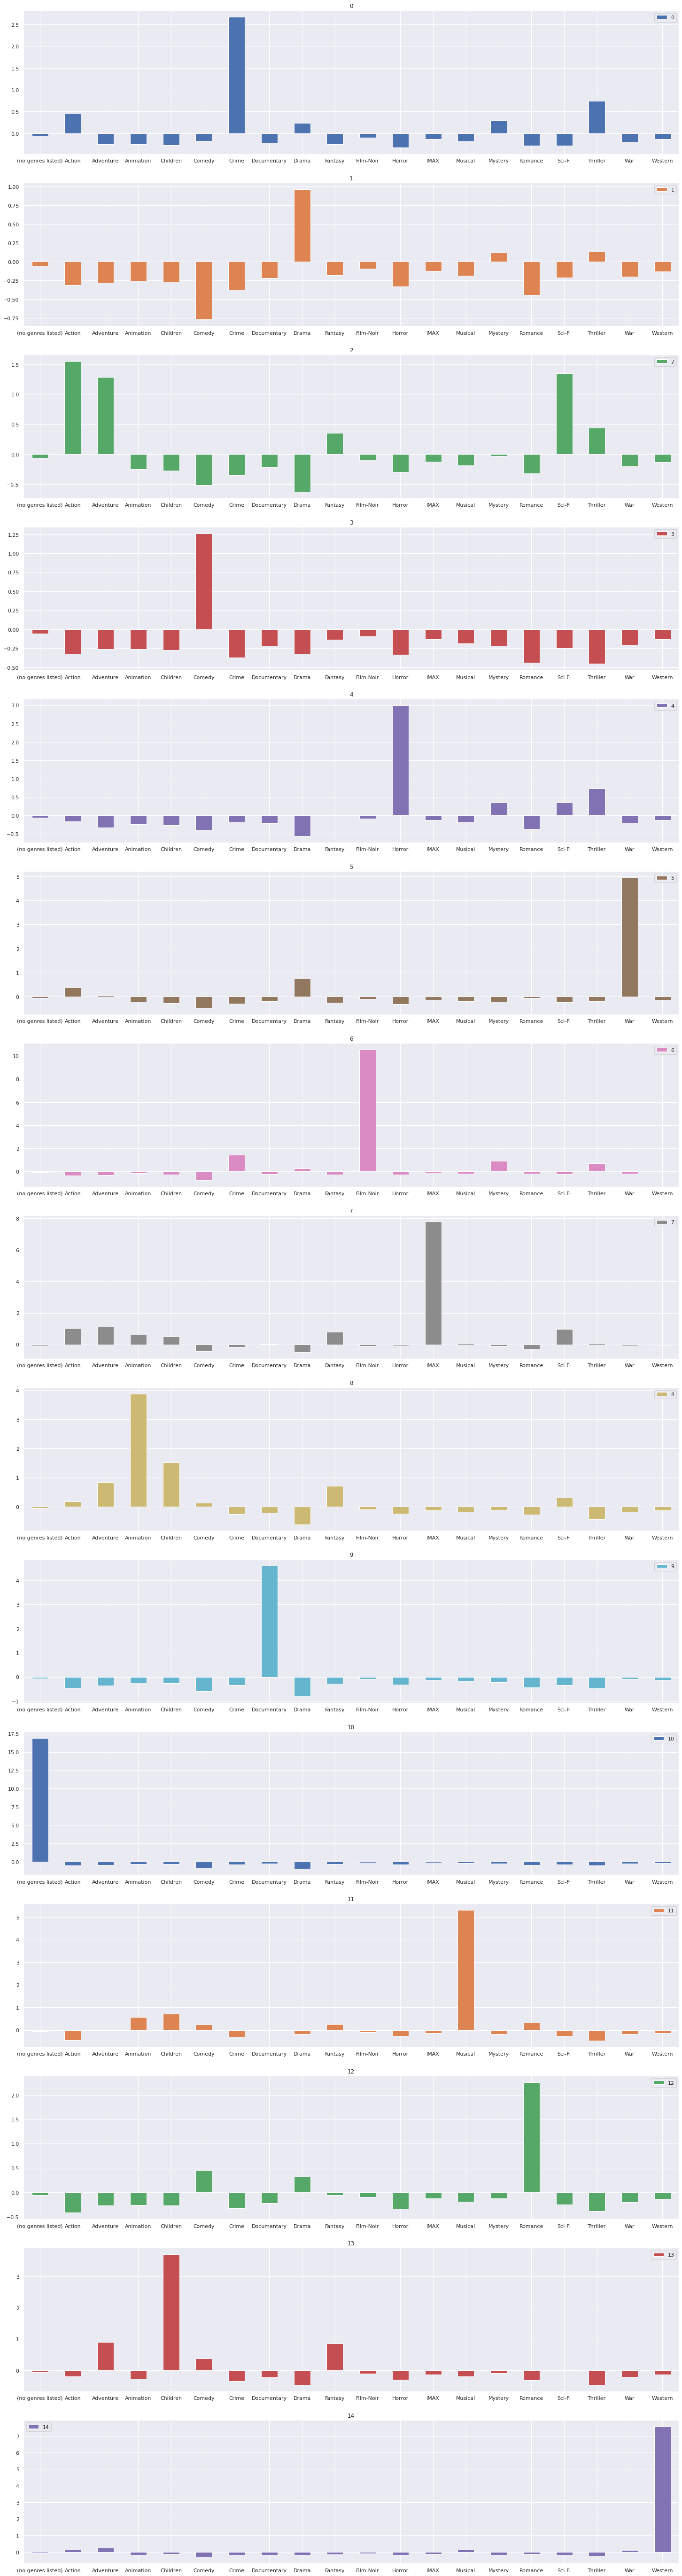

In [79]:
modelo = KMeans(n_clusters=15)
modelo.fit(generos_escalados)

grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

grupos.T.plot.bar(subplots=True, figsize=(25,100), sharex=False, rot=0);

In [80]:
matriz_de_distancia = linkage(grupos)
matriz_de_distancia

array([[ 1.        ,  3.        ,  2.49849893,  2.        ],
       [12.        , 15.        ,  2.89946725,  3.        ],
       [ 0.        , 16.        ,  3.34396089,  4.        ],
       [ 2.        , 17.        ,  3.37281076,  5.        ],
       [ 4.        , 18.        ,  3.78690994,  6.        ],
       [13.        , 19.        ,  4.36183213,  7.        ],
       [ 8.        , 20.        ,  4.70371963,  8.        ],
       [ 9.        , 21.        ,  5.18877945,  9.        ],
       [ 5.        , 22.        ,  5.26090778, 10.        ],
       [11.        , 23.        ,  5.81223183, 11.        ],
       [14.        , 24.        ,  7.87429334, 12.        ],
       [ 7.        , 25.        ,  8.06725699, 13.        ],
       [ 6.        , 26.        , 10.76430601, 14.        ],
       [10.        , 27.        , 17.07634357, 15.        ]])

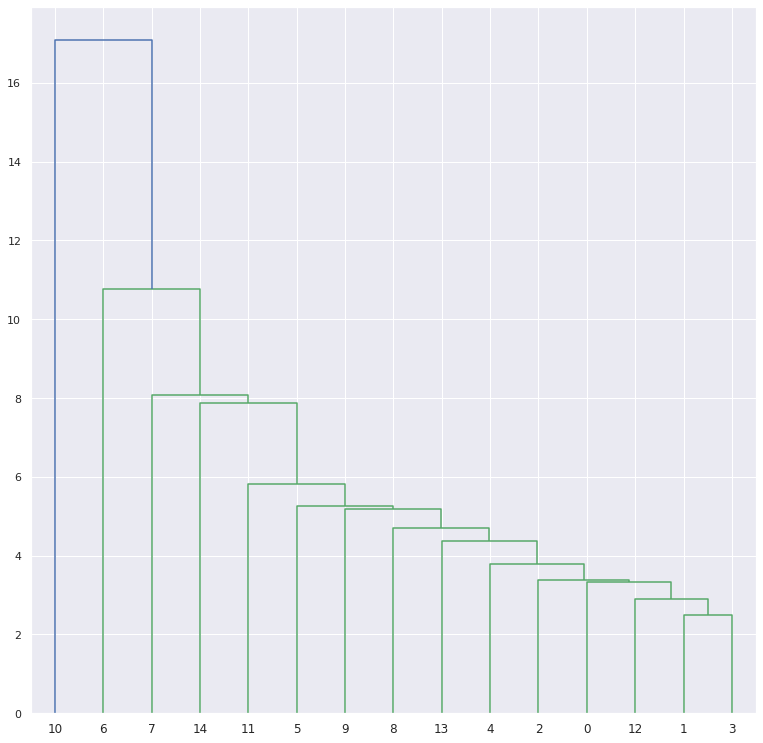

In [82]:
dendrograma = dendrogram(matriz_de_distancia)
dendrograma;